# Probabilistic Ensembles for Control (PECO)

This Python module contains functions and classes to apply probabilistic machine learning techniques to control problems.

It contains standard neural networks and deep ensemble models as well as a constrained trajectory optimization method (constrained iLQR) for solving nonlinear optimal control problems.

In future versions it will also contain model-based reinforcement learning algorithms.

# Creating your own system (based on its state-space model)

Every PECO environment (system) inherits from the `gym` environment class and is therefore compatible with many other available reinforcement learning algorithms.

The base class is `StateSpaceEnv`. Let us consider the following double integrator:

\begin{align}
\dot x_1 =  x_2 \\
\dot x_2 = u_1
\end{align}

At first let us import the necessary packages:

In [1]:
import numpy as np
import peco
from peco.system_models.core import StateSpaceEnv

No we have to define the ODE of our system:

In [2]:
def ODE(t, x, u):
    x1, x2 = x
    u1, = u
    return np.array([x2, u1])

In [3]:
x0 = np.array([0., 0.]) # initial state

In [4]:
double_integrator = StateSpaceEnv(state_dim=2, control_dim=1, ode=ODE, time_step=0.01, init_state=x0)

To simulate our system, we have to take a `step()`. This means, we apply a control signal `u` to the system for `time_step` seconds.

In [5]:
double_integrator.reset() # reset to x0
for step in range(1000):
    u = np.array([.5])
    double_integrator.step(u)

To show the simulation results simply call the 'plot' method.

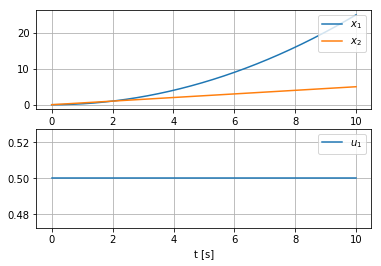

In [6]:
fig = double_integrator.plot()

The corresponding data is contained within the 'trajectory' dictionairy:

In [7]:
traj = double_integrator.trajectory

In [8]:
time = traj['time']
states = traj['states']
controls = traj['controls']

# Creating your own system via Lagrangian mechanics

We can also create a system model from the Lagrangian. This automates the process of modelling by hand. The process is really straight forward an there are numerous examples in the package folder `peco/system_models/`. If you want to create your own, have look at the coressponding file. Currently implemented (with a method for rendering) are the following systems:
    - pendulum
    - acrobot
    - planar manipulator
    - cart-pole system
    - double, triple and quadruple cart-pole systems


In [9]:
from peco.system_models.pendulum import Pendulum

In [10]:
pendulum = Pendulum()

gcc -c -fPIC -lm /Users/MaxPritzkoleit/Nextcloud/probabilistic-ensembles-for-control/peco/system_models/state_eq_fnc.c -o /Users/MaxPritzkoleit/Nextcloud/probabilistic-ensembles-for-control/peco/system_models/state_eq_fnc.o

gcc -shared /Users/MaxPritzkoleit/Nextcloud/probabilistic-ensembles-for-control/peco/system_models/state_eq_fnc.o -o /Users/MaxPritzkoleit/Nextcloud/probabilistic-ensembles-for-control/peco/system_models/state_eq_fnc.so

loading  /Users/MaxPritzkoleit/Nextcloud/probabilistic-ensembles-for-control/peco/system_models/state_eq_fnc.so


The controls of the pendulum are bounded. We can sample uniform randomly from the control space via `random_step()`.

In [13]:
pendulum.reset()
for step in range(500):
    pendulum.random_step()

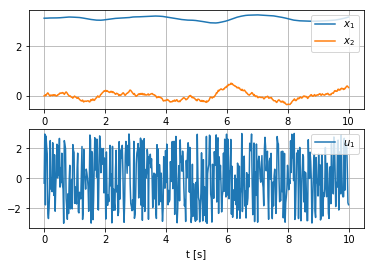

In [14]:
fig = pendulum.plot()

### Rendering the system

There is also the option, to animate the system in a seperate window, based on the `render()` method from `gym`.

In [16]:
pendulum.reset()
for step in range(500):
    pendulum.random_step()
    pendulum.render()
pendulum.close()

### Saving the rendered video

If you would like to save a video of the rendering, we need to import the `VideoRecorder` from `gym` and call the `caputure_frame()` method to save the frame.

In [17]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder

In [20]:
vid = VideoRecorder(pendulum, 'pendulum.mp4')
pendulum.reset()
for step in range(500):
    pendulum.random_step()
    vid.capture_frame()
vid.close()

# Trajectory Optimization

Trajectory is a widely used advanced control technique to generate trajectories of a dynamical system, that minimize a certain cost function. 